In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

In [ ]:
categories = ['airplanes', 'Motorbikes']
base_path = '/content/gdrive/My Drive/CSE472/BOW/Train_images' # Need to upload your own Caltech 101 dataset in the folder and rename this folder
detector = cv2.ORB_create()

In [ ]:
train_paths = []
train_labels = []
train_features = np.array([])
img_len = 200
count = 0

In [ ]:
for idx, category in enumerate(categories):
  dir_path = base_path + '/' + category
  
  for i in range(img_len):
    img_path = dir_path + '/' + 'image_%04d.jpg' % (i+1)
    train_paths.append(img_path)
    train_labels.append(idx)
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kpt, desc = detector.detectAndCompute(gray, None)
    if train_features.size == 0:
      train_features = np.float32(desc)
    else:
      train_features = np.append(train_features, np.float32(desc), axis=0)

    count+=1
    print('%d/%d - %s - %d feature points are detected\n' % (count, img_len*2, img_path, desc.shape[0]))

1/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0001.jpg - 401 feature points are detected

2/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0002.jpg - 411 feature points are detected

3/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0003.jpg - 395 feature points are detected

4/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0004.jpg - 403 feature points are detected

5/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0005.jpg - 407 feature points are detected

6/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0006.jpg - 363 feature points are detected

7/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0007.jpg - 357 feature points are detected

8/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplanes/image_0008.jpg - 375 feature points are detected

9/400 - /content/gdrive/My Drive/CSE472/BOW/Train_images/airplan

In [ ]:
dictionary_size = 50
dict_file = '/content/gdrive/My Drive/CSE472/BOW/dictionary_220906.npy' # rename this
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)
ret, label, dictionary = cv2.kmeans(train_features, dictionary_size, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
np.save(dict_file, dictionary)

In [ ]:
knn = cv2.ml.KNearest_create()
knn.train(dictionary, cv2.ml.ROW_SAMPLE, np.float32(range(dictionary_size)))
train_desc = np.float32(np.zeros((len(train_paths), dictionary_size)))

for i, path in  enumerate(train_paths):
  img = cv2.imread(path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  kpt, desc = detector.detectAndCompute(gray, None)

  ret, result, neighbours, dist = knn.findNearest(np.float32(desc), k=1)
  hist, bins = np.histogram(np.int32(result), bins=range(dictionary_size + 1))
  train_desc[i, :] = np.float32(hist) / np.float32(np.sum(hist))
  print('%d/%d - Representing %s \n' % (i, len(train_paths), img_path))

0/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

1/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

2/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

3/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

4/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

5/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

6/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

7/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

8/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

9/400 - Representing /content/gdrive/My Drive/CSE472/BOW/Train_images/Motorbikes/image_0200.jpg 

10/400 - Representin

In [ ]:
svm_model_file = '/content/gdrive/My Drive/CSE472/BOW/svmmodel.xml'  #rename this
svm = cv2.ml.SVM_create()
svm.trainAuto(train_desc, cv2.ml.ROW_SAMPLE, np.array(train_labels))
svm.save(svm_model_file)

In [ ]:
test_desc = np.float32(np.zeros((2, dictionary_size)))

img_path1 = base_path + '/' + categories[0] + '/image_0500.jpg'
img_path2 = base_path + '/' + categories[1] + '/image_0500.jpg'

img1 = cv2.imread(img_path1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
kpt1, desc1 = detector.detectAndCompute(gray1, None)
ret, result1, neighbours, dist = knn.findNearest(np.float32(desc1), k=1)
hist1, bins = np.histogram(np.int32(result1), bins=range(dictionary_size + 1))

img2 = cv2.imread(img_path2)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kpt2, desc2 = detector.detectAndCompute(gray2, None)
ret, result2, neighbours, dist = knn.findNearest(np.float32(desc2), k=1)
hist2, bins = np.histogram(np.int32(result2), bins=range(dictionary_size + 1))

test_desc[0, :] = np.float32(hist1) / np.float32(np.sum(hist1))
test_desc[1, :] = np.float32(hist2) / np.float32(np.sum(hist2))

ret, result = svm.predict(test_desc)
                                                  


In [ ]:
result

array([[0.],
       [1.]], dtype=float32)

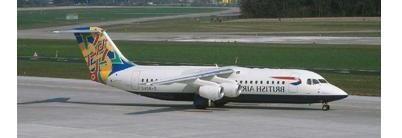

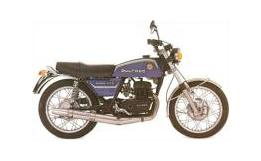

In [ ]:
cv2_imshow(img1)
cv2_imshow(img2)